# Exploratory Data Analysis on 911 Dataset

Source : [Kaggle](https://www.kaggle.com/datasets/mchirico/montcoalert?select=911.csv)

## Aim : Insites which can be helpfull in understanding Emergency trends


## Importing required liberaries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

## Importing dataset

In [159]:
df = pd.read_csv('911.csv')

In [160]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [162]:
df['call_type'] = df['title'].apply(lambda x: x.split(':')[0])

In [171]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,day,month,year,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,10,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,10,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,10,12,2015,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,10,12,2015,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,10,12,2015,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic,29,7,2020,15
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS,29,7,2020,15
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,29,7,2020,15
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,29,7,2020,15


In [163]:
df['call_type'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: call_type, dtype: int64

In [164]:
df['call_type'].value_counts().iplot(kind='bar')

## Insight : Most call was related to Medical Emergency

In [206]:
df['Actual_reason'] = df['title'].apply(lambda x: x.split(':')[1])


In [211]:
df[['call_type','Actual_reason']].value_counts().head(5)

call_type  Actual_reason         
Traffic     VEHICLE ACCIDENT -       148372
            DISABLED VEHICLE -        47909
Fire        FIRE ALARM                38336
EMS         FALL VICTIM               34676
            RESPIRATORY EMERGENCY     34248
dtype: int64

## Insight : 
1. Most traffic related calls  are for Vehicle Accident and Disabled Vehicle.
2. Most Fire related calls are for Fire alarm.
3. Most Medical emergency calls are related to Fall Victim and Respiratory emergency.

In [166]:
df['title'].value_counts().iplot(kind='bar')

In [167]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [168]:
df['day'] = df['timeStamp'].apply(lambda x : x.day)
df['month'] = df['timeStamp'].apply(lambda x : x.month)
df['year'] = df['timeStamp'].apply(lambda x : x.year)
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)


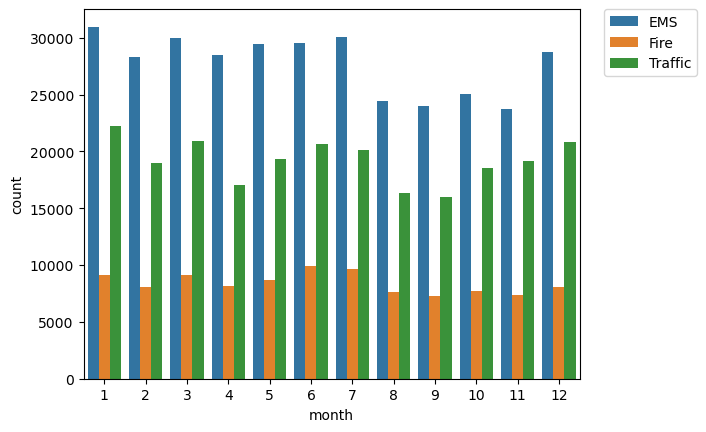

In [175]:
sns.countplot(x='month', data=df,hue='call_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Insight : 
1. Fire issues increase in Summer (in June and July)
2. Medical Emergency Decreases in month of Aug , Sept, Oct and Nov.

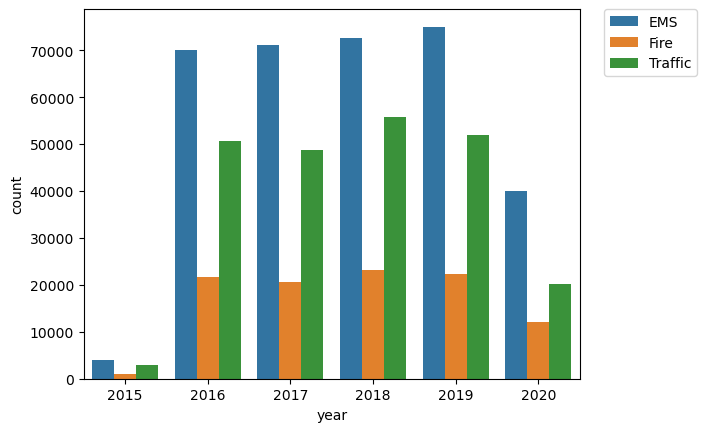

In [179]:
sns.countplot(x='year', data=df,hue='call_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Insights :
1. Emergency calls Increased constantly untill 2019.
2. Emergency calls Decreased Drastically in 2020.
3. Available data points for 2015 and 2020 is very less than data points of 2016,17,18 and 19.


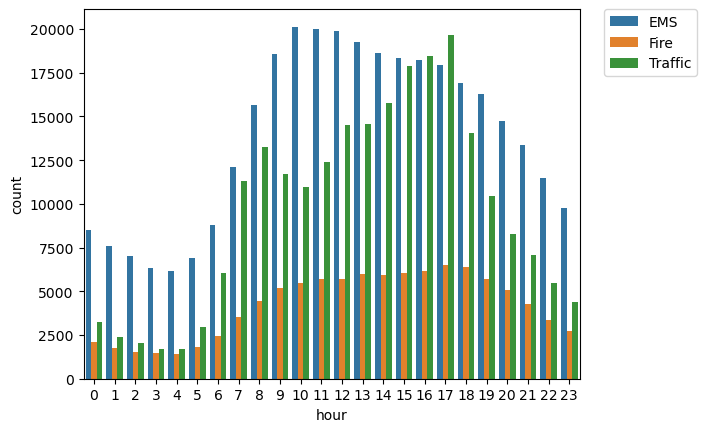

In [181]:
sns.countplot(x='hour', data=df,hue='call_type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Insights :
1. Frequency of calls starts constantly decreasing during 6pm to 6am.
2. Traffic related Calls are maximum in between 2pm to 6pm.
3. Medical Emergency related calls are at peak between 8am to 1pm.
4. Frequecy of Fire related calls never drops drastically like Medical and Traffic emergencies calls.

In [183]:
df[['twp']].value_counts().head(20)

twp              
LOWER MERION         55490
ABINGTON             39947
NORRISTOWN           37633
UPPER MERION         36010
CHELTENHAM           30574
POTTSTOWN            27387
UPPER MORELAND       22932
LOWER PROVIDENCE     22476
PLYMOUTH             20116
UPPER DUBLIN         18862
HORSHAM              18380
WHITEMARSH           17754
MONTGOMERY           17315
UPPER PROVIDENCE     16122
SPRINGFIELD          15504
LIMERICK             14338
EAST NORRITON        13963
WHITPAIN             13480
LANSDALE             11963
HATFIELD TOWNSHIP    11641
dtype: int64

In [184]:
df[['twp']].value_counts().tail(5)

twp            
EAST GREENVILLE    1316
BRYN ATHYN         1254
GREEN LANE          385
PHILA COUNTY        267
LEHIGH COUNTY       190
dtype: int64

In [185]:
df[['twp']].value_counts().head(100).iplot(kind='bar')
df[['twp']].value_counts().tail(10).iplot(kind='bar')

## Insight : 
### Top Disturbed Towns : 
1. EAST GREENVILLE
2. BRYN ATHYN 
3. GREEN LANE
4. PHILA COUNTY 
5. LEHIGH COUNTY  

### Top Safe Towns :
1. LEHIGH COUNTY
2. PHILA COUNTY
3. GREEN LANE
4. BRYN ATHYN
5. EAST GREENVILLE 

In [186]:
df[['addr','twp']].value_counts().head(5)

addr                               twp             
SHANNONDELL DR & SHANNONDELL BLVD  LOWER PROVIDENCE    7285
MAIN ST & OLD SUMNEYTOWN PIKE      LOWER SALFORD       2576
THE FAIRWAY  & RYDAL RD            ABINGTON            1986
EAGLEVILLE RD & SUNDERLAND DR      LOWER PROVIDENCE    1618
EVERGREEN RD & W LIGHTCAP RD       LOWER POTTSGROVE    1567
dtype: int64

## Insight : 
1. Get call from SHANNONDELL DR & SHANNONDELL BLVD of  LOWER PROVIDENCE  7285 times
2. Get call from MAIN ST & OLD SUMNEYTOWN PIKE of LOWER SALFORD 2576 times
3. Get call from THE FAIRWAY  & RYDAL RD of ABINGTON 1986 times
4. Get call from EAGLEVILLE RD & SUNDERLAND DR of LOWER PROVIDENCE 1618 times
5. Get call from EVERGREEN RD & W LIGHTCAP RD of LOWER POTTSGROVE 1567 times

# Corelation analysis

In [188]:
df['call_type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [190]:
def call_type_to_num(x):
    if x == 'EMS': return 1
    elif x =='Fire': return 2
    elif x =='Traffic': return 3

df['reason'] = df['call_type'].apply(call_type_to_num) 

In [197]:
df.drop('e',axis=1,inplace=True)

In [200]:
corr_df =df.corr()

<AxesSubplot:>

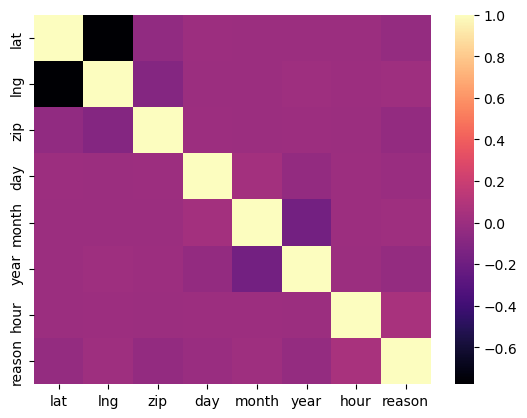

In [202]:
sns.heatmap(corr_df,cmap='magma')

## Insights:
1. There is No much Correlation between diffrent features.

# Final Insights

## Emergency related Insights: 
1. Most call was related to Medical Emergency
2. Most traffic related calls  are for Vehicle Accident and Disabled Vehicle.
3. Most Fire related calls are for Fire alarm.
4. Most Medical emergency calls are related to Fall Victim and Respiratory emergency.

## Month related Insights:
1. Fire issues increase in Summer (in June and July)
2. Medical Emergency Decreases in month of Aug , Sept, Oct and Nov.
3. Emergency calls Increased constantly untill 2019.
4. Emergency calls Decreased Drastically in 2020.
5. Available data points for 2015 and 2020 is very less than data points of 2016,17,18 and 19.

## Time related Insights:
10. Frequency of calls starts constantly decreasing during 6pm to 6am.
11. Traffic related Calls are maximum in between 2pm to 6pm.
12. Medical Emergency related calls are at peak between 8am to 1pm.
4. Frequecy of Fire related calls never drops drastically like Medical and Traffic emergencies calls.


## Most calls comes from : 
1. EAST GREENVILLE
2. BRYN ATHYN 
3. GREEN LANE
4. PHILA COUNTY 
5. LEHIGH COUNTY  

## Least calls come from:
1. LEHIGH COUNTY
2. PHILA COUNTY
3. GREEN LANE
4. BRYN ATHYN
5. EAST GREENVILLE 

## Top address's calling 911 frequently 
1. Get call from SHANNONDELL DR & SHANNONDELL BLVD of  LOWER PROVIDENCE  7285 times
2. Get call from MAIN ST & OLD SUMNEYTOWN PIKE of LOWER SALFORD 2576 times
3. Get call from THE FAIRWAY  & RYDAL RD of ABINGTON 1986 times
4. Get call from EAGLEVILLE RD & SUNDERLAND DR of LOWER PROVIDENCE 1618 times
5. Get call from EVERGREEN RD & W LIGHTCAP RD of LOWER POTTSGROVE 1567 times
